<h1>DEEP LEARNING PROJECT</h1>
<p>In this project deep learning is used.<br>
This project will predict, whether the loan will be approved or not for the customer.<br>
y --> loan_status , x --> other columns.<br></p>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("libraries imported!")

libraries imported!


<h1>1. Reading data for csv file.</h1>

In [98]:
loan_data_file_path =("https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/loan%20aproaval%20DL/loan_approval_dataset.csv")
df = pd.read_csv(loan_data_file_path)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


<h1>2. Gathering Information about dataframe.</h1>

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


<h1>3. Checking duplicates and null values.</h1>

In [100]:
df.duplicated().sum()

0

In [101]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

<h1>4. Analyzing data.</h1>

In [102]:
df[" self_employed"].value_counts()

 self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [103]:
df.columns = df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [104]:
df["education"].value_counts().keys()

Index([' Graduate', ' Not Graduate'], dtype='object', name='education')

In [105]:
cat_columns = ["education","self_employed","loan_status"]
for i in cat_columns:
    df[i] = df[i].str.strip()    

In [106]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


<h1>5. Converting categorical columns to numerical columns using binary encoding.</h1>

In [107]:
clean_data = pd.get_dummies(df,drop_first="if_binary").astype(int)
clean_data

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes,loan_status_Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,1,1
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,1,0
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,0,1
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,0,0


<h1>6. Spliting dataframe into x and y.</h1>

In [108]:
x = clean_data.drop("loan_status_Rejected",axis="columns")
y = clean_data[["loan_status_Rejected"]]

In [109]:
x.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1


In [110]:
y.head()

,loan_status_Rejected
0,0
1,1
2,1
3,1
4,1


<h1>7. Train and Test spliting of x and y variables.</h1>

In [111]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_tranformed = std.fit_transform(x)

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_tranformed.shape

(4269, 12)

In [114]:
# training and testing split
x_train, x_test, y_train, y_test = train_test_split(x_tranformed,y,test_size=0.15)

<h1>8. Creating architecture for ANN.</h1>

In [115]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [116]:
# creating empty box
ann_model = Sequential()   

# dense layers ---> hidden layers
# units ---> number of neurons
# relu ---> activation function , 90% of the time present on hidden layers, easy formula --->  z = x1.w1 + x2.w2 + .... + xnwn + b , sigma(z)
# input_dim ---> input layer
# number of neurons on input layers is equals to number of x variables
ann_model.add(Dense(units = 68, activation = "relu", input_dim = x_train.shape[1]))
ann_model.add(Dense(units = 45, activation = "relu"))
ann_model.add(Dense(units = 28, activation = "relu"))

# output layer 
# single neuron for binary classificaion (approved ---> 0, rejected ---> 1)
# multiclass classification ---> classes more than 2 
# sigmoid for binary classificaion, softmax for multiclass classification and linear for linear problem
ann_model.add(Dense(units = 1, activation = "sigmoid"))

# compilation
# loss function ---> for classification ( log loss, binary_crossentropy, categorical_crossentropy, sparse_categorical_crossentropy ) and for regression ( MSE, MAE )
# for binary ( binary_crossentropy )
# for multiclass ( categorical_crossentropy or sparse_categorical_crossentropy )
# optimizers ---> adam and adama
ann_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

ann_model.summary()

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 68)             │           884 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 45)             │         3,105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 28)             │         1,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            29 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,306 (20.73 KB)

 Trainable params: 5,306 (20.73 KB)

 Non-trainable params: 0 (0.00 B)

<h1>9. Training and Testing of model.</h1>

In [117]:
# epochs --->


ann_model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 0.6847 - loss: 0.5804
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.9111 - loss: 0.2220
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.9462 - loss: 0.1676
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.9454 - loss: 0.1542
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.9482 - loss: 0.1428
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.9509 - loss: 0.1258
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.9551 - loss: 0.1304
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.9585 - loss: 0.1188
Epoch 9/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.9684 - loss: 0.0935
Epoch 10/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.9630 - loss: 0.1031


In [118]:
history = ann_model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))
history
# validation data ---> testing data 

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9696 - loss: 0.0818 - val_accuracy: 0.9641 - val_loss: 0.0896
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9707 - loss: 0.0756 - val_accuracy: 0.9548 - val_loss: 0.1081
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9748 - loss: 0.0734 - val_accuracy: 0.9704 - val_loss: 0.0906
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9729 - loss: 0.0652 - val_accuracy: 0.9657 - val_loss: 0.0924
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9797 - loss: 0.0567 - val_accuracy: 0.9641 - val_loss: 0.0952
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9801 - loss: 0.0574 - val_accuracy: 0.9688 - val_loss: 0.0908
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9819 - loss: 0.0548 - val_accuracy: 0.9626 - val_loss: 0.0893
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9851 - loss: 0.0482 - val_accuracy: 0.

<h1>10. Coverting training and testing score into dataframe.</h1>

In [119]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.969956,0.083088,0.964119,0.089638
1,0.973264,0.078769,0.954758,0.108135
2,0.974366,0.076616,0.970359,0.090573
3,0.973264,0.070666,0.965679,0.092422
4,0.975469,0.066011,0.964119,0.095184
5,0.977398,0.059614,0.968799,0.090846
6,0.981808,0.055209,0.962559,0.089317
7,0.982084,0.050460,0.976599,0.073300
8,0.984013,0.044330,0.962559,0.096492
9,0.984840,0.047060,0.968799,0.084567


<h1>11. Ploting training and testing score.</h1>


<Axes: >

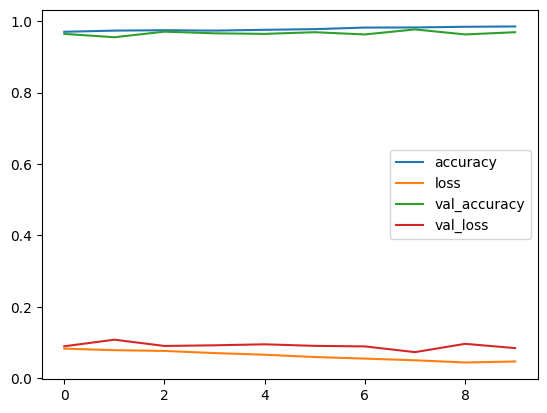

In [120]:
pd.DataFrame(history.history).plot()

<h1>12. Prediction of model.</h1>


In [121]:
pred = ann_model.predict(x_test)
prediction = (pred > 0.5).astype(int).ravel()
prediction

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [122]:
x_test.shape

(641, 12)

In [123]:
pred.shape

(641, 1)

In [124]:
y_test["prediction"] = prediction
y_test.head()

,loan_status_Rejected,prediction
3597,1,1
1745,1,1
1392,0,0
3389,1,1
1318,0,0


In [125]:
# classification report 
#  confusion matrix


<h1>13. Saving model.</h1>

In [126]:
ann_model.save("loan_approval_model.h5")